# this is a disaster but i need to submit this report in like now

In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from scipy.optimize import curve_fit

In [69]:
dpath0 = "data/natLight.csv" # Take from after 30s
dpath1 = 'data/polLight1.csv'
dpath2 = 'data/polLight2.csv'
dpath3 = 'data/malus1.csv'
dpath4 = 'data/malus2.csv'

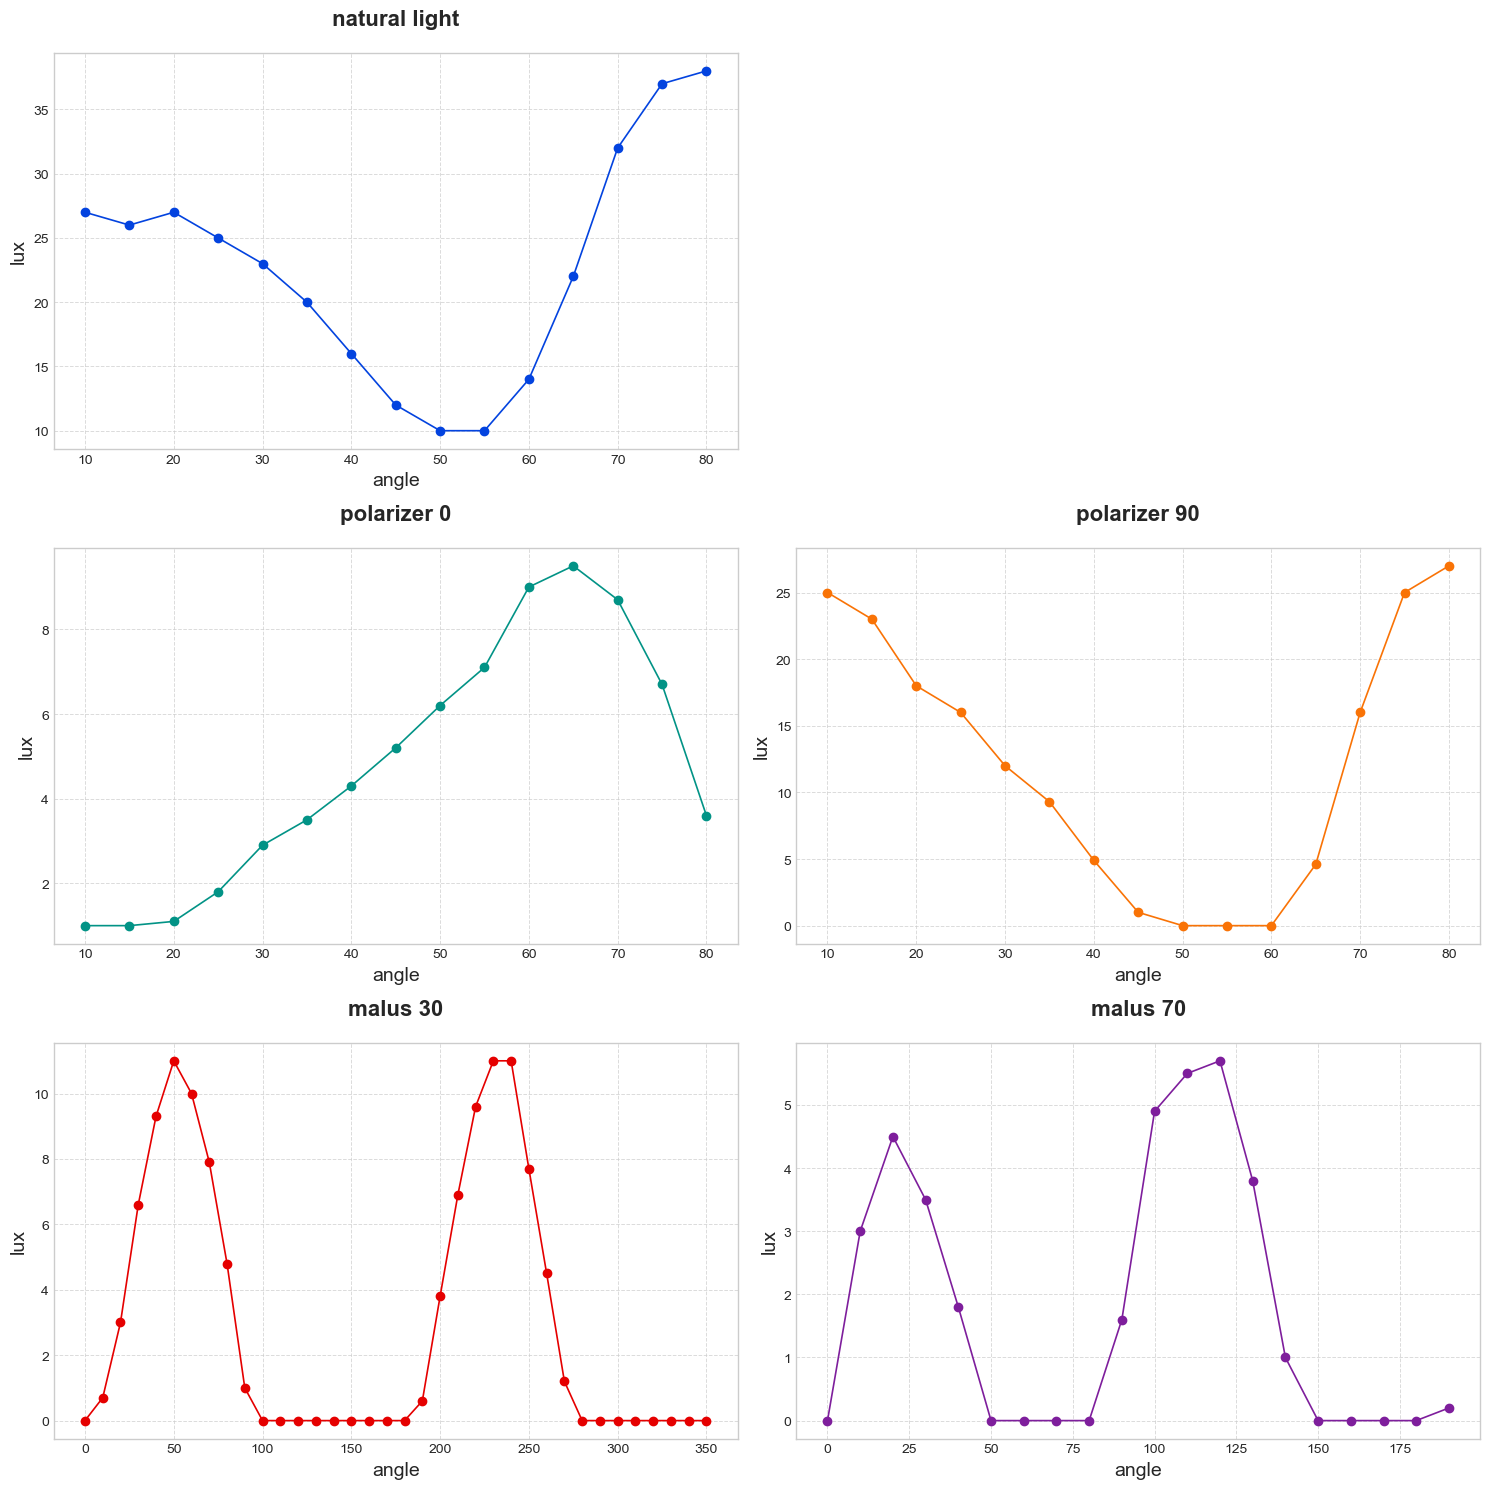

In [79]:
# Read and parse the data
data0 = pd.read_csv(dpath0, sep=',', header=0, names=['angle', 'lux'])
data1 = pd.read_csv(dpath1, sep=',', header=0, names=['angle', 'lux'])
data2 = pd.read_csv(dpath2, sep=',', header=0, names=['angle', 'lux'])
data3 = pd.read_csv(dpath3, sep=',', header=0, names=['angle', 'lux'])
data4 = pd.read_csv(dpath4, sep=',', header=0, names=['angle', 'lux'])

# Plot the data
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(15,15))


ax1 = fig.add_subplot(3, 2, 1)
ax1.plot(data0['angle'][:-1], data0['lux'][:-1], linewidth=1.2, color='xkcd:blue', marker='o')
ax1.set_title('natural light', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('lux', fontsize=14)
ax1.set_xlabel('angle', fontsize=14)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

ax2 = fig.add_subplot(3, 2, 3)
ax2.plot(data1['angle'], data1['lux'], linewidth=1.2, color='xkcd:teal', marker='o')
ax2.set_title('polarizer 0', fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('lux', fontsize=14)
ax2.set_xlabel('angle', fontsize=14)
ax2.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

ax3 = fig.add_subplot(3, 2, 4)
ax3.plot(data2['angle'], data2['lux'], linewidth=1.2, color='xkcd:orange', marker='o')
ax3.set_title('polarizer 90', fontsize=16, fontweight='bold', pad=20)
ax3.set_ylabel('lux', fontsize=14)
ax3.set_xlabel('angle', fontsize=14)
ax3.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

ax4 = fig.add_subplot(3, 2, 5)
ax4.plot(data3['angle'], data3['lux'], linewidth=1.2, color='xkcd:red', marker='o')
ax4.set_title('malus 30', fontsize=16, fontweight='bold', pad=20)
ax4.set_ylabel('lux', fontsize=14)
ax4.set_xlabel('angle', fontsize=14)
ax4.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

ax5 = fig.add_subplot(3, 2, 6)
ax5.plot(data4['angle'], data4['lux'], linewidth=1.2, color='xkcd:purple', marker='o')
ax5.set_title('malus 70', fontsize=16, fontweight='bold', pad=20)
ax5.set_ylabel('lux', fontsize=14)
ax5.set_xlabel('angle', fontsize=14)
ax5.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()

In [3]:
# I am absolutely sure there is a more efficient way to do this but I have like 10 minutes to do this so it is what it is
sampleData1, sampleData2, sampleData3, sampleData4, sampleData5 = [pd.read_csv(f'data/sample/p{i}.txt', sep='\t', header=None, names=['angle', 'lux']) for i in range(1,6)]

initial guesses: [np.float64(142.0), 0.01, np.float64(26.9)]
bounded fit params: [ 0.04717507  0.10602995 32.51967205]


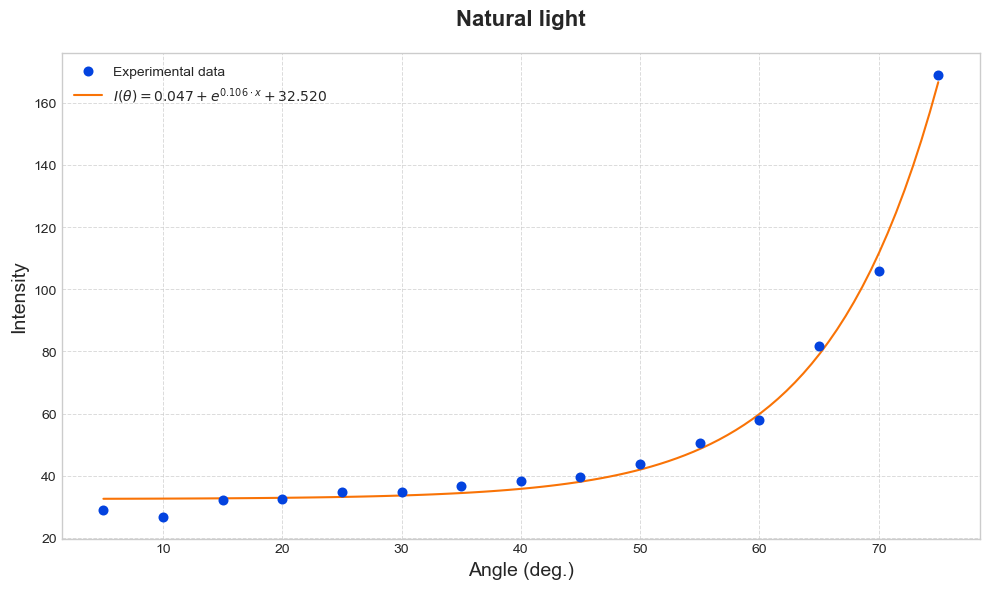

In [56]:
def expfun(x, a, b, c):
    return a * np.exp(b*x) + c

x, y = (np.array(sampleData1['angle'].astype(float)), np.array(sampleData1['lux'].astype(float)))

# Try with bounded fit to avoid runaway parameters (again)
# initial guesses: a ~ (y.max()-y.min()), b small negative/positive depending on trend, c ~ y.min() or 0
a0 = max(1e-6, (y.max() - y.min()))
b0 = -0.01 if (y[-1] < y[0]) else 0.01
c0 = max(0.0, y.min())
p0 = [a0, b0, c0]
# bounds: keep a positive, b in a reasonable range, c near data range
lower = [0.0, -1.0, -np.inf]
upper = [np.inf, 1.0, np.inf]
print('initial guesses:', p0)

popt, pcov = curve_fit(expfun, x, y, p0=p0, bounds=(lower, upper), maxfev=10000)
space = np.linspace(min(x), max(x), 100)
print('bounded fit params:', popt)

plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(x, y, linewidth=1.2, color='xkcd:blue', marker='o', zorder=2, label='Experimental data')
ax1.plot(space, expfun(space, *popt), color='xkcd:orange', zorder=1, label=rf'$I(\theta) = {popt[0]:.3f} + e^{{{popt[1]:.3f} \cdot x}} + {popt[2]:.3f}$')
ax1.set_title('Natural light', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Intensity', fontsize=14)
ax1.set_xlabel('Angle (deg.)', fontsize=14)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax1.legend()

plt.tight_layout()
plt.savefig('natural.png', dpi=300)
plt.show()

S initial guesses: [np.float64(64.7), 0.01, np.float64(14.5)]
S bounded fit params: [4.72697471 0.03717276 6.41049471]
P initial guesses: [np.float64(50.3), 0.01, 0.0, 1, 1]
P bounded fit params: [   1.00902808    0.99         -0.52322387 -156.06908068    6.77869706]


/var/folders/vj/p_wfrn2s5dd6k2_7ngzxs6j40000gn/T/ipykernel_30671/687043320.py:25: RuntimeWarning: invalid value encountered in sqrt
  return d * (a * np.cos(np.radians(x)) - np.sqrt(a**2 - np.sin(np.radians(x))**2)) / (a * np.cos(np.radians(x)) + np.sqrt(a**2 - np.sin(np.radians(x))**2))**2 + e


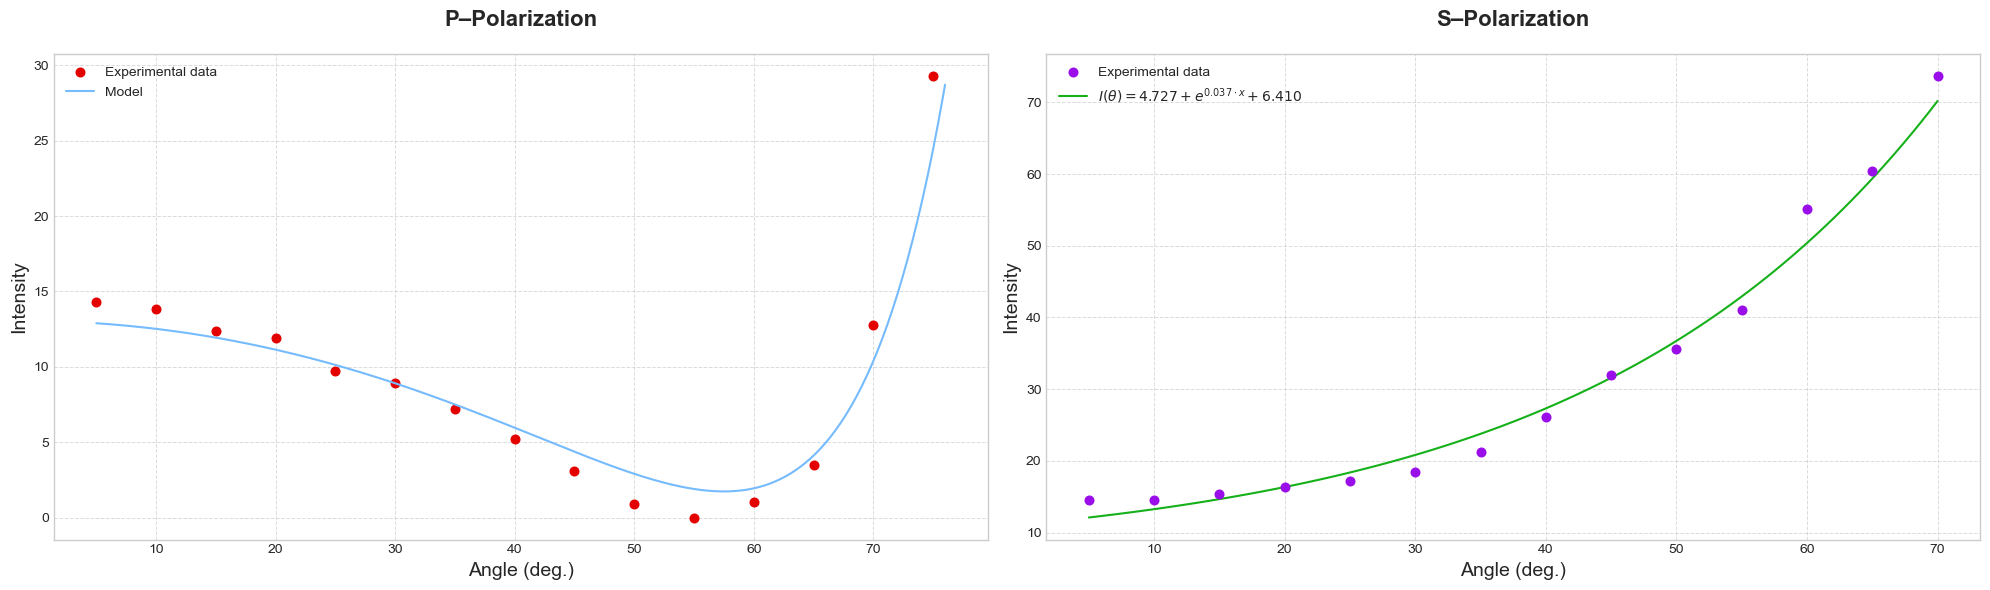

In [66]:
x2, y2 = (np.array(sampleData2['angle'].astype(float)), np.array(sampleData2['lux'].astype(float)))
x, y = (np.array(sampleData3['angle'].astype(float)), np.array(sampleData3['lux'].astype(float)))


def expfun(x, a, b, c): 
    return a * np.exp(b*x) + c

# Try with bounded fit to avoid runaway parameters (again)
# initial guesses: a ~ (y.max()-y.min()), b small negative/positive depending on trend, c ~ y.min() or 0
a0 = max(1e-6, (y.max() - y.min()))
b0 = -0.01 if (y[-1] < y[0]) else 0.01
c0 = max(0.0, y.min())
p0 = [a0, b0, c0]
# bounds: keep a positive, b in a reasonable range, c near data range
lower = [0.0, -1.0, -np.inf]
upper = [np.inf, 1.0, np.inf]
print('S initial guesses:', p0)

popt, pcov = curve_fit(expfun, x, y, p0=p0, bounds=(lower, upper), maxfev=10000)
space = np.linspace(min(x), 70, 100)
print('S bounded fit params:', popt)


def pfun(x, a, b, c, d, e):
    return d * (a * np.cos(np.radians(x)) - np.sqrt(a**2 - np.sin(np.radians(x))**2)) / (a * np.cos(np.radians(x)) + np.sqrt(a**2 - np.sin(np.radians(x))**2))**2 + e


# Try with bounded fit to avoid runaway parameters (again)
# initial guesses: a ~ (y.max()-y.min()), b small negative/positive depending on trend, c ~ y.min() or 0
a02 = max(1e-6, (y2.max() - y2.min()))
b02 = -0.01 if (y2[-1] < y2[0]) else 0.01
c02 = max(0.0, y2.min())
p02 = [a02, b02, c02, 1, 1]
# bounds: keep a positive, b in a reasonable range, c near data range
lower = [0.0, -1.0, -np.inf, -np.inf, -np.inf]
upper = [np.inf, 1.0, np.inf, np.inf, np.inf]
print('P initial guesses:', p02)

popt2, pcov2 = curve_fit(pfun, x2, y2, p0=p02, bounds=(lower, upper), maxfev=10000)
space2 = np.linspace(min(x2), 76, 500)
print('P bounded fit params:', popt2)


plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(sampleData2['angle'][:-1], sampleData2['lux'][:-1], linewidth=1.2, color='xkcd:red', marker='o', label='Experimental data')
ax1.plot(space2, meas_model(space2, *popt3), color='xkcd:sky blue', zorder=1, label=rf'Model')
ax1.set_title('P–Polarization', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Intensity', fontsize=14)
ax1.set_xlabel('Angle (deg.)', fontsize=14)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(sampleData3['angle'][:-1], sampleData3['lux'][:-1], linewidth=1.2, color='xkcd:violet', marker='o', zorder=2, label='Experimental data')
ax2.plot(space, expfun(space, *popt), color='xkcd:green', zorder=1, label=rf'$I(\theta) = {popt[0]:.3f} + e^{{{popt[1]:.3f} \cdot x}} + {popt[2]:.3f}$')
ax2.set_title('S–Polarization', fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('Intensity', fontsize=14)
ax2.set_xlabel('Angle (deg.)', fontsize=14)
ax2.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax2.legend()

plt.tight_layout()
plt.savefig('polarized.png', dpi=300)
plt.show()

x range: 5.0 to 80.0
y range: 0.0 to 50.3
non-positive y? True
initial p0: [1.5, np.float64(50.3), np.float64(0.0), 0.0]
Fitted parameters:
n = 1.657104419924351 +/- 1.1109305104375222
scale = 185.2287725351944 +/- 444.2138527706584
offset = 1.7295758059233506 +/- 0.9530323234015636
theta_offset (deg) = 1.3931418036284733 +/- 18.005093095875
Brewster angle (deg) from fitted n: 58.89060327613827


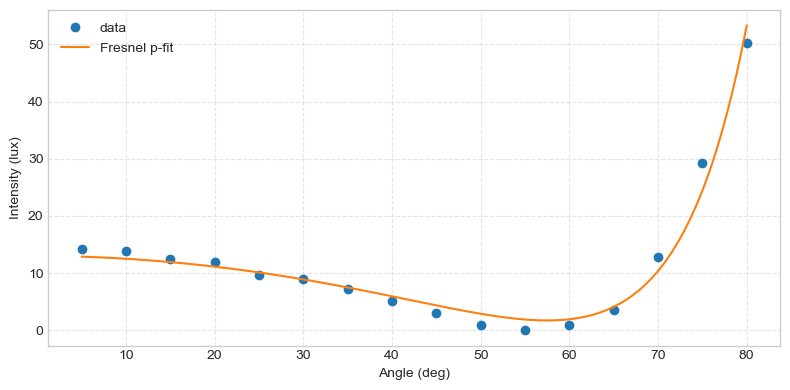

Measured minimum at angle ≈ 55.0 deg, intensity = 0.0


In [48]:
# Fit P-polarized Fresnel reflectance to measured angle vs intensity data (sampleData2)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def Rp_model(theta_deg, n):
    """P-polarized reflectance Rp(θ) for air (n1=1) -> medium (n2=n).
    theta_deg: incident angle in degrees (array-like)
    n: refractive index of second medium (scalar)"""
    theta = np.radians(theta_deg)
    n1 = 1.0
    n2 = float(n)
    # transmitted angle via Snell's law; guard domain with clip to avoid invalid values
    sin_t = (n1 / n2) * np.sin(theta)
    sin_t_clipped = np.clip(sin_t, -1.0, 1.0)
    cos_t = np.sqrt(np.clip(1.0 - sin_t_clipped**2, 0.0, 1.0))
    rp = (n2 * np.cos(theta) - n1 * cos_t) / (n2 * np.cos(theta) + n1 * cos_t)
    return np.abs(rp)**2

def meas_model(theta_deg, n, scale, offset, theta_offset):
    """Measured intensity model: scale * Rp(theta + theta_offset, n) + offset
    scale and offset map theoretical reflectance (0..1) to detector units (lux)
    theta_offset absorbs small encoder/calibration errors."""
    return scale * Rp_model(theta_deg + theta_offset, n) + offset

# Prepare data from sampleData2 (angle vs lux)
x = np.array(sampleData2['angle'].astype(float))
y = np.array(sampleData2['lux'].astype(float))

print('x range:', x.min(), 'to', x.max())
print('y range:', y.min(), 'to', y.max())
print('non-positive y?', (y <= 0).any())

# Initial guess and bounds: n in [1,3], scale>0, small angle offset +/-5 deg
p0 = [1.5, max(1.0, y.max()), y.min(), 0.0]  # [n, scale, offset, theta_offset]
bounds = ([1.0, 0.0, -np.inf, -5.0], [3.0, np.inf, np.inf, 5.0])
print('initial p0:', p0)

# Exclude clearly bad points (optional): e.g., exact zeros or saturations can be masked
mask = ~np.isnan(y)
# mask &= (y >= 0)  # keep non-negative
x_fit = x[mask]
y_fit = y[mask]

try:
    popt, pcov = curve_fit(meas_model, x_fit, y_fit, p0=p0, bounds=bounds, maxfev=20000)
    perr = np.sqrt(np.diag(pcov))
    print('Fitted parameters:')
    print('n =', popt[0], '+/-', perr[0])
    print('scale =', popt[1], '+/-', perr[1])
    print('offset =', popt[2], '+/-', perr[2])
    print('theta_offset (deg) =', popt[3], '+/-', perr[3])
    theta_B = np.degrees(np.arctan(popt[0]))
    print('Brewster angle (deg) from fitted n:', theta_B)
except Exception as e:
    print('Fit failed:', e)
    popt = None

# Plot data and fit
theta_fine = np.linspace(x.min(), x.max(), 500)
plt.figure(figsize=(8,4))
plt.plot(x, y, 'o', label='data')
popt3=popt
if popt is not None:
    plt.plot(theta_fine, meas_model(theta_fine, *popt), '-', label='Fresnel p-fit')
plt.xlabel('Angle (deg)')
plt.ylabel('Intensity (lux)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# If fit is poor, report the measured minimum (Brewster-like)
min_idx = np.argmin(y)
print('Measured minimum at angle ≈', x[min_idx], 'deg, intensity =', y[min_idx])

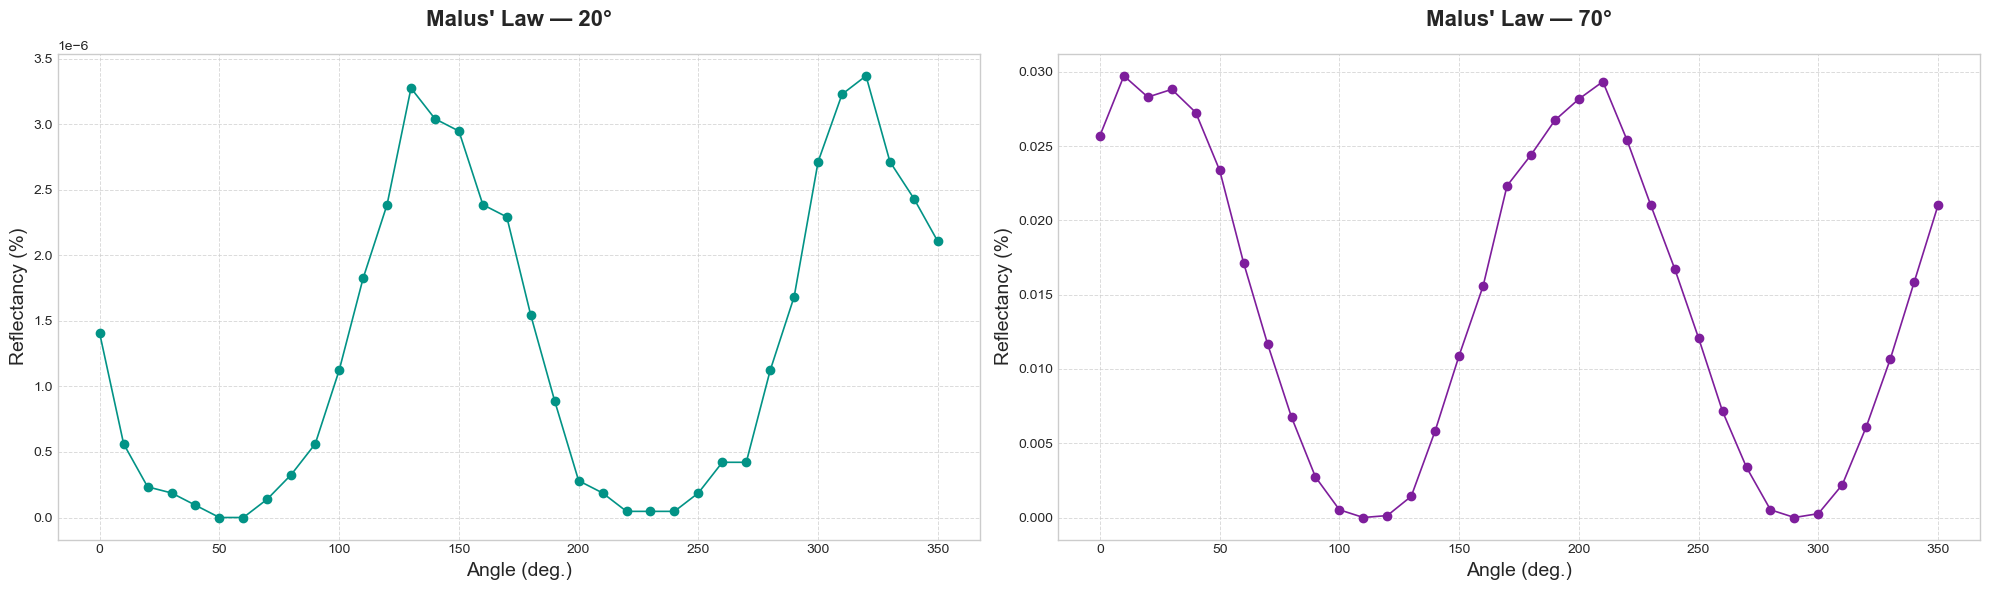

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(20,6))

sampleData4['lux'] = 100*sampleData4['lux']/2775
sampleData5['lux'] = 100*sampleData5['lux']/2775

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(sampleData4['angle'][:-1], sampleData4['lux'][:-1], linewidth=1.2, color='xkcd:teal', marker='o')
ax1.set_title('Malus\' Law — 20°', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Reflectancy (%)', fontsize=14)
ax1.set_xlabel('Angle (deg.)', fontsize=14)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(sampleData5['angle'][:-1], sampleData5['lux'][:-1], linewidth=1.2, color='xkcd:purple', marker='o')
ax2.set_title('Malus\' Law — 70°', fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('Reflectancy (%)', fontsize=14)
ax2.set_xlabel('Angle (deg.)', fontsize=14)
ax2.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.savefig('malus.png', dpi=300)
plt.show()